-----------------------------
## Context:
-----------------------------
In this case study, we will use the Air pollution dataset which contains information about 13 months of data on major pollutants and meteorological levels of a city. 

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and extract insights. 

## Importing libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA and TSNE
from sklearn.decomposition import PCA

#### Loading data

In [2]:
#Loading data
data= pd.read_csv("Air_Pollution.csv")

In [3]:
data.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


#### Check the info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

- There are 403 observations and 27 columns in the data.
- All the columns except Date and Weather are of numeric data type.
- The Date and SrNo for all observations would be unique. We can drop these columns as they would not add value to our analysis.
- Weather is of object data type. We can create dummy variables for each category and convert it to numeric data type.
- The majority of the columns have some missing values.
- Let's check the number of missing values in each column.

In [5]:
data.isnull().sum()

SrNo                  0
Date                  0
NO                    2
CO                    1
NO2                   2
O3                    6
SO2                   4
PM2.5                 2
Benzene               1
Toulene               1
P_Xylene             31
NOx                   2
PM10                  2
WindDirection         1
NH3                   2
RH                    1
Temp                  2
WindSpeed             1
VerticalWindSpeed     2
Solar                 2
BarPressure           2
Weather               0
PD_PM2.5             10
PD_PM10              11
PD_NO2               12
PD_SO2               13
PD_CO                11
dtype: int64

- All the columns except SrNo and Date have missing values.

#### Data Preprocessing

In [6]:
data.drop(columns=["SrNo", "Date"], inplace=True)

In [7]:
#Imputing missing values with mode(most frequent) for the Weather column and with median for all other columns
for col in data.columns:
    if col == "Weather":
        data[col].fillna(value=data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(value=data[col].median(), inplace=True)

In [8]:
#Creating dummy variables for Weather column
data = pd.get_dummies(data, drop_first=True)

In [9]:
data.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,732.25,108.24,250.105,73.52,21.605,1.775,0,0,1,0
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,734.05,48.99,82.850,47.94,16.880,1.770,0,0,1,0
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,728.08,108.24,250.105,73.52,21.605,1.775,0,0,1,0
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,730.47,46.93,171.360,59.86,13.110,0.500,0,0,1,0
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,730.62,112.95,232.220,63.56,16.190,0.770,0,0,1,0


#### Scaling the data

### Question 1: Define Standard scaler and fit to the data_scaled

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [11]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [12]:
data_scaled.describe().T # mean close to 0, and std close to 1

,count,mean,std,min,25%,50%,75%,max
NO,403.0,1.093694e-16,1.001243,-0.825645,-0.719491,-0.432404,0.377353,4.126305
CO,403.0,-1.234193e-16,1.001243,-1.244831,-0.628340,-0.268460,0.329254,11.072465
NO2,403.0,-5.537341e-17,1.001243,-1.907948,-0.769817,-0.029110,0.659008,2.894518
O3,403.0,8.278462e-17,1.001243,-1.741973,-0.880379,-0.103382,0.686695,3.514564
SO2,403.0,-2.520730e-16,1.001243,-1.032889,-0.653106,-0.169817,0.428720,13.766332
PM2.5,403.0,-2.231466e-16,1.001243,-1.326647,-0.738248,-0.259984,0.416857,5.008254
Benzene,403.0,3.796246e-16,1.001243,-1.601756,-0.826601,-0.154633,0.602905,2.764782
Toulene,403.0,-1.873329e-16,1.001243,-1.655384,-0.721288,-0.091496,0.552260,3.006428
P_Xylene,403.0,2.482161e-16,1.001243,-1.182765,-0.688513,-0.294500,0.347795,3.759749
NOx,403.0,-1.363673e-16,1.001243,-1.194519,-0.755981,-0.299808,0.497019,3.905588


## Principal Component Analysis

### Question 2: Define PCA with n components and random_state =1 and fit to the scaled data.

In [13]:
#Defining the number of principal components to generate 
n = data_scaled.shape[1]

#Finding principal components for the data
pca1 = PCA(n_components=n, random_state=1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled), columns=data.columns)

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

In [14]:
data_pca

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-2.742064,0.090409,-0.544034,-0.639932,1.305489,1.049067,-0.965436,0.103459,0.051540,0.198931,...,0.675502,0.804767,-0.665327,0.583680,-0.496965,0.237807,-0.311625,0.022113,-0.256680,-0.016397
1,-2.518826,1.834496,-0.820265,-0.125443,1.226361,0.136618,-0.763263,-1.243801,-0.533671,0.864223,...,0.488313,1.215222,-0.411048,0.421006,-0.146722,0.095045,-0.074077,-0.198902,-0.279627,-0.056044
2,-3.234021,-1.678367,0.109291,-0.832131,-0.425673,-0.604315,0.621228,0.278716,1.541888,0.131122,...,0.802738,0.111171,0.242053,0.430897,-0.351020,0.200112,-0.122626,-0.160006,-0.106472,0.030652
3,-2.722372,-0.876209,0.114949,-0.334952,-0.926435,-1.151151,0.121267,-0.785277,0.602173,-0.051567,...,0.372883,0.380353,0.109244,0.607604,-0.328072,0.150243,-0.260876,0.126214,-0.057704,0.025010
4,-1.952577,-1.032156,0.308900,-0.634766,-0.561540,-0.982848,0.067600,-0.769568,0.042768,0.356044,...,0.623313,-0.002952,0.282050,0.437699,-0.152451,0.206255,-0.137898,-0.130241,-0.113247,0.011455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.377477,-2.833380,-1.327138,-1.307556,-2.260970,-0.918250,-0.354822,0.298462,-0.452664,-0.731200,...,-0.272777,0.609752,0.268063,0.136613,0.547656,-0.631524,-0.298067,0.183220,-0.292562,0.134019
399,-1.613237,-2.343882,-2.457767,-1.958795,-2.468323,-0.127545,0.917422,1.306465,-0.475935,-0.187057,...,0.594204,0.025188,-0.652844,-0.277841,0.377907,-0.473787,-0.019883,-0.240223,0.163084,-0.022819
400,-3.872231,-1.990180,-2.550924,-0.897667,-0.366726,1.258623,-1.306530,1.251411,-0.912761,-1.663890,...,0.773632,0.278808,-0.790530,0.362298,0.026506,-0.182100,-0.650285,-0.060376,0.103009,-0.056261
401,-2.420606,0.912599,-1.106143,-0.130414,0.414722,0.241150,-0.850811,-1.268872,-0.386708,-0.215392,...,0.782070,0.310841,-1.065966,-0.236845,0.053271,-0.206459,-0.395384,0.074167,-0.152383,-0.041282


In [15]:
exp_var1

array([0.40157886, 0.12764382, 0.07673692, 0.06749461, 0.04392657,
       0.03559814, 0.03115307, 0.02781003, 0.02365943, 0.02158212,
       0.01841877, 0.01622558, 0.01499302, 0.01363074, 0.01281323,
       0.0118397 , 0.01011448, 0.00961036, 0.00878955, 0.00583886,
       0.00510724, 0.00430188, 0.00307071, 0.0025847 , 0.00247086,
       0.00167626, 0.00082498, 0.00050549])

Text(0, 0.5, 'Cumulative Explained Variance')

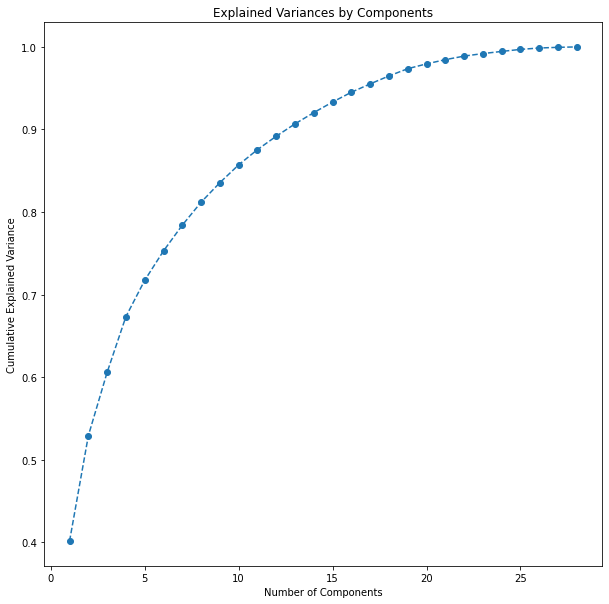

In [16]:
# visulaize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,29), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

### Question 3: How many Principal components explains more than 70% variance in the dataset

In [17]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
  sum = sum + i
  if(sum>0.7):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  5


In [18]:
#Making a new dataframe with first 8 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5],2), index=data_scaled.columns, columns=cols)

In [19]:
pc1

,PC1,PC2,PC3,PC4,PC5
NO,0.25,-0.05,0.18,0.14,-0.13
CO,0.21,0.04,0.18,-0.00,-0.03
NO2,0.19,-0.22,0.18,0.06,0.24
O3,0.02,-0.38,-0.02,0.18,0.08
SO2,0.12,-0.19,-0.20,0.28,-0.11
PM2.5,0.26,-0.06,-0.10,-0.18,-0.14
Benzene,0.27,0.09,0.15,0.01,-0.01
Toulene,0.25,0.10,0.27,0.08,0.01
P_Xylene,0.25,0.07,0.22,0.03,-0.10
NOx,0.24,0.01,0.26,0.15,-0.12


### Question 4 : Interpret the coefficients of Five principal components from the below dataframe.

<AxesSubplot:>

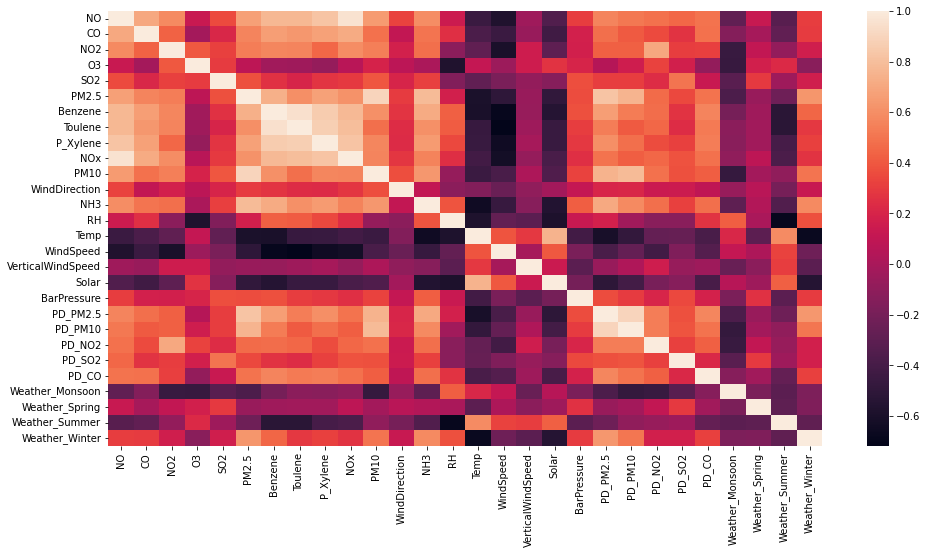

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr())

In [21]:
def color_high(val):
    if val <= -0.15: # you can decide any value as per your understanding
#         return 'background: pink'
        if val > -0.25:
            return 'background: pink'
        elif val <= -0.25:
            return 'background: red'
    elif val >= 0.15:
        if val < 0.25:
            return 'background: skyblue' 
        elif val >= 0.25:
            return 'background: blue'
    
pc1.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
NO,0.250000,-0.050000,0.180000,0.140000,-0.130000
CO,0.210000,0.040000,0.180000,-0.000000,-0.030000
NO2,0.190000,-0.220000,0.180000,0.060000,0.240000
O3,0.020000,-0.380000,-0.020000,0.180000,0.080000
SO2,0.120000,-0.190000,-0.200000,0.280000,-0.110000
PM2.5,0.260000,-0.060000,-0.100000,-0.180000,-0.140000
Benzene,0.270000,0.090000,0.150000,0.010000,-0.010000
Toulene,0.250000,0.100000,0.270000,0.080000,0.010000
P_Xylene,0.250000,0.070000,0.220000,0.030000,-0.100000
NOx,0.240000,0.010000,0.260000,0.150000,-0.120000


1. The first principal component, PC1, is associated with air pollutants mainly NO, CO, PM2.5, Benzene, Toulene, P_Xylene, NOx and PM10. It is also associated with low values of temperature and wind speed (winter). Therefore, PC1 seems to capture the overall quality of air, meaning **the higher PC1, the more polluted the air**. This tends to happen during **winter**.
2. PC2 is highly related to high levels of Relative Humidity (RH) and **monsoon season**. It is also particularly related to low temperature, low wind speed, and low concetration of certain gases such as NO2 and O3. It seems that humidity **improves air quality** and this PC captures this.
3. PC3 relates to high levels of temperature and vertical wind speed which seem to increase concentration of some pollutants (mainly toulene and NOx). This PC also shows negative relationships with pressure, wind speed, and winter. PC3 shows that sunny clear **(sping) days with no wind  mean an increase in rise pollutant levels**.
4. PC4 is highly averse to summer and winter, but very keen to spring. It is also associated to high atmospheric pressures and an increase in concentrations of pollutants,O3 and SO2, that don't follow the general trend of other pollutants.
5. PC5 is mainly associated with a negative wind direction (meaning westward winds?) and low solar levels. This happends during spring when vertical wind speed is high.